<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [1]:
#| echo: false
#| output: asis
show_doc(calculate_metrics_by_thresh_binary)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/tune.py#L38){target="_blank" style="float:right; font-size:smaller"}

### calculate_metrics_by_thresh_binary

>      calculate_metrics_by_thresh_binary (y_true:<built-infunctionarray>,
>                                          y_prob:<built-infunctionarray>, metri
>                                          cs:Union[Callable,Sequence[Callable]]
>                                          , thresholds:Optional[Sequence]=None)

Calculate binary classification metrics as a function of
threshold

Takes prediction to be `1` when `y_prob` is greater than the
threshold, `0` otherwise.

Parameters:

- `y_true`: Ground-truth values with shape (n_items,)
- `y_prob`: Probability distributions with shape (n_items, 2)
- `metrics`: Callables that take `y_true`, `y_pred` as positional
arguments and return a number. Must have a `__name__` attribute.
- `thresholds`: `Sequence` of `float` threshold values to use. By
default uses `0` and the values that appear in `y_prob[:, 1]`, which
is a minimal set that covers all of the relevant possibilities. One
reason to override that default would be to save time with a large
dataset.

Returns: DataFrame with one column "thresh" indicating the
thresholds used and an additional column for each input metric
giving the value of that metric at that threshold.

For instance, we can use [`calculate_metrics_by_thresh_binary`](https://gsganden.github.io/model_inspector/tune.html#calculate_metrics_by_thresh_binary) to find the threshold that maximizes a model's F1 score.

In [47]:
y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y_prob = np.array(
    [
        [0.9, 0.1],
        [0.7, 0.3],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.4, 0.6],
        [0.3, 0.7],
        [0.1, 0.9],
    ]
)

results = calculate_metrics_by_thresh_binary(
    y_true=y_true,
    y_prob=y_prob,
    metrics=[metrics.recall_score, metrics.precision_score, metrics.f1_score],
).iloc[:-1, :]
results

  0%|                                                                                                   | 0/7 [00:00<?, ?it/s]/Users/greg.gandenberger/.pyenv/versions/3.11.2/envs/model_inspector311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 252.75it/s]


,thresh,recall_score,precision_score,f1_score
0,0.0,1.0,0.500000,0.666667
1,0.1,1.0,0.555556,0.714286
2,0.3,1.0,0.625000,0.769231
3,0.4,0.8,0.800000,0.800000
4,0.6,0.4,1.000000,0.571429
5,0.7,0.2,1.000000,0.333333


Best result:


thresh             0.4
recall_score       0.8
precision_score    0.8
f1_score           0.8
Name: 3, dtype: float64

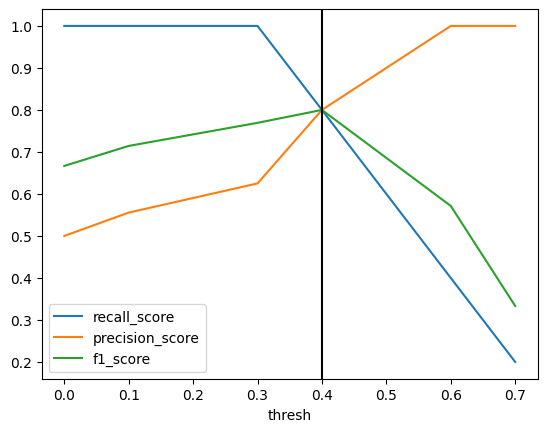

In [48]:
ax = results.plot(x="thresh")
best_row = results.loc[results.loc[:, "f1_score"].idxmax()]
best_thresh = best_row.loc["thresh"]
ax.axvline(best_thresh, c="k")

print("Best result:")
best_row

In [2]:
#| echo: false
#| output: asis
show_doc(calculate_metrics_by_thresh_multi)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/tune.py#L81){target="_blank" style="float:right; font-size:smaller"}

### calculate_metrics_by_thresh_multi

>      calculate_metrics_by_thresh_multi (y_true:<built-infunctionarray>,
>                                         y_prob:<built-infunctionarray>, metric
>                                         s:Union[Callable,Sequence[Callable]],
>                                         thresholds:Optional[Sequence]=None)

Calculate multiclass metrics as a function of threshold

Takes prediction to be the position of the column in `y_prob` with
the greatest value if that value is greater than the threshold,
`np.nan` otherwise.

Parameters:

- `y_true`: Ground-truth values
- `y_prob`: Probability distributions
- `metrics`: Callables that take `y_true`, `y_pred` as positional arguments
and return a number. Must have a `__name__` attribute.
- `thresholds`: `Sequence` of `float` threshold values to use. By
default uses 0 and all values that appear in `y_prob`, which is a
minimal set that covers all of the relevant possibilities. One
reason to override that default would be to save time with a large
dataset.

Returns: DataFrame with one column "thresh" indicating the
thresholds used and an additional column for each input metric
giving the value of that metric at that threshold.

Suppose that in a multiclass problem we want to track two metrics: coverage (how often we make a prediction) and precision (how often our predictions are right when we make them). We will choose the threshold an $F_\beta$-like metric that maximizes a weighted harmonic mean of those two metrics that puts twice as much weight on precision as coverage.

In [3]:
#| echo: false
#| output: asis
show_doc(coverage)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/tune.py#L125){target="_blank" style="float:right; font-size:smaller"}

### coverage

>      coverage (y_true:<built-infunctionarray>, y_pred:<built-infunctionarray>)

How often the model makes a prediction, where `np.nan` indicates
abstaining from predicting.

Parameters:

- `y_true`: Ground-truth values
- `y_pred`: Predicted values, possibly including `np.nan` to
indicate abstraining from predicting

In [4]:
#| echo: false
#| output: asis
show_doc(calculate_metric_ignoring_nan)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/tune.py#L138){target="_blank" style="float:right; font-size:smaller"}

### calculate_metric_ignoring_nan

>      calculate_metric_ignoring_nan (y_true:<built-infunctionarray>,
>                                     y_pred:<built-infunctionarray>,
>                                     metric:Callable, *args, **kwargs)

Calculate `metric` ignoring `np.nan` predictions

Parameters:

- `y_true`: Ground-truth values
- `y_pred`: Predicted values, possibly including `np.nan` to
indicate abstraining from predicting
- `metric`: Function that takes `y_true`, `y_pred` as keyword
arguments

Any additional arguments will be passed to `metric`

In [5]:
#| echo: false
#| output: asis
show_doc(fbeta)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/tune.py#L161){target="_blank" style="float:right; font-size:smaller"}

### fbeta

>      fbeta (precision:float, recall:float, beta:float=1)

In [55]:
precision_ignoring_nan = partial(
    calculate_metric_ignoring_nan,
    metric=partial(metrics.precision_score, average="micro"),
)
precision_ignoring_nan.__name__ = "precision_ignoring_nan"

y_true = np.array([0, 0, 1, 2])
y_prob = np.array([[0.9, 0.1, 0], [0.2, 0.8, 0], [0.2, 0.8, 0], [0.3, 0.4, 0.3]])

results = calculate_metrics_by_thresh_multi(
    y_true=y_true,
    y_prob=y_prob,
    metrics=[coverage, precision_ignoring_nan],
).iloc[:-1, :]
results.loc[:, "quasi_fbeta"] = results.apply(
    lambda row: fbeta(
        precision=row.loc["precision_ignoring_nan"],
        recall=row.loc["coverage"],
        beta=0.5,
    ),
    axis="columns",
)
results

  0%|                                                                                                   | 0/8 [00:00<?, ?it/s]/Users/greg.gandenberger/.pyenv/versions/3.11.2/envs/model_inspector311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 649.35it/s]


,thresh,coverage,precision_ignoring_nan,quasi_fbeta
0,0.0,1.00,0.500000,0.555556
1,0.0,1.00,0.500000,0.555556
2,0.1,1.00,0.500000,0.555556
3,0.2,1.00,0.500000,0.555556
4,0.3,1.00,0.500000,0.555556
5,0.4,0.75,0.666667,0.681818
6,0.8,0.25,1.000000,0.625000


Best result:


thresh                    0.400000
coverage                  0.750000
precision_ignoring_nan    0.666667
quasi_fbeta               0.681818
Name: 5, dtype: float64

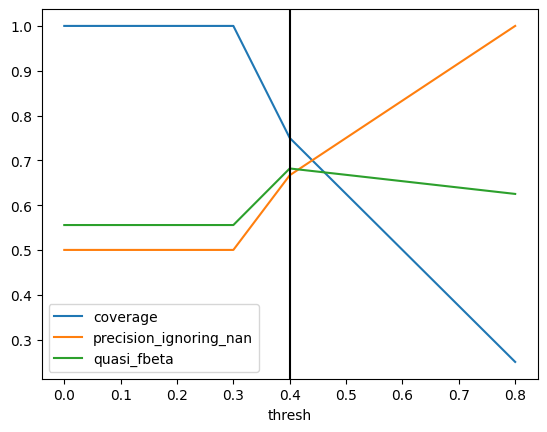

In [56]:
ax = results.plot(x="thresh")
best_row = results.loc[results.loc[:, "quasi_fbeta"].idxmax(), :]
ax.axvline(best_row.loc["thresh"], c="k")
print("Best result:")
best_row

In [6]:
#| echo: false
#| output: asis
show_doc(confusion_matrix)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/tune.py#L169){target="_blank" style="float:right; font-size:smaller"}

### confusion_matrix

>      confusion_matrix (y_true:Union[<built-
>                        infunctionarray>,pandas.core.series.Series],
>                        y_pred:Union[<built-
>                        infunctionarray>,pandas.core.series.Series],
>                        shade_axis:Union[str,int,NoneType]=None,
>                        sample_weight:Optional[<built-infunctionarray>]=None,
>                        normalize:Optional[str]=None)

Get confusion matrix

Parameters:

- `y_true`: Ground-truth values
- `y_pred`: Predicted values
- `shade_axis`: `axis` argument to pass to
`pd.DataFrame.style.background_gradient`

The remaining parameters are passed to
`sklearn.metrics.confusion_matrix`.

In [60]:
confusion_matrix(
    y_true=np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
    y_pred=np.array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1]),
)

,Predicted 0,Predicted 1,Totals
Actual 0,4,1,5
Actual 1,2,3,5
Totals,6,4,10


In [61]:
confusion_matrix(
    y_true=np.array([0, 0, 2, 0, 0, 1, 1, 1, 1, 1]),
    y_pred=np.array([0, 0, 2, 0, 1, 2, 1, 1, 0, 1]),
    shade_axis="rows",
)

,Predicted 0,Predicted 1,Predicted 2,Totals
Actual 0,3,1,0,4
Actual 1,1,3,1,5
Actual 2,0,0,1,1
Totals,4,4,2,10
